In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Helper import ParseCntrlTime, ParseSignificantStrikes, ParseTds

import pandas as pd
import numpy  as np

# Loading the Dataset
The dataset was acquired through an ethical webscraping script from ufcstats.com.

In [3]:
fight_df: pd.DataFrame = pd.read_csv("Data/ufc_fight_data.csv")

In [4]:
fight_df = fight_df.dropna()
fight_df

,fighter_1,fighter_2,winner,method,round_finished,fight_time,referee,time_format,url,A_Fighter,...,B_Sub._att,B_Rev.,B_Ctrl,B_Sig._str,B_Head,B_Body,B_Leg,B_Distance,B_Clinch,B_Ground
0,Jhonata Diniz,Alvin Hines,Jhonata Diniz,Decision - Unanimous,3,5:00,Herb Dean,3 Rnd (5-5-5),http://ufcstats.com/fight-details/043172689e41...,Jhonata Diniz,...,0,0,0:05,82 of 259,56 of 224,21 of 29,5 of 6,80 of 256,2 of 3,0 of 0
1,Hyder Amil,Jose Delgado,Jose Delgado,KO/TKO,1,0:26,Marc Goddard,3 Rnd (5-5-5),http://ufcstats.com/fight-details/2f523b757f7f...,Hyder Amil,...,0,0,0:02,9 of 11,7 of 9,2 of 2,0 of 0,4 of 5,2 of 3,3 of 3
2,Brandon Royval,Joshua Van,Joshua Van,Decision - Unanimous,3,5:00,Jason Herzog,3 Rnd (5-5-5),http://ufcstats.com/fight-details/f722b96ae686...,Brandon Royval,...,0,0,0:09,204 of 305,138 of 232,37 of 43,29 of 30,181 of 270,20 of 27,3 of 8
3,Terrance McKinney,Viacheslav Borshchev,Terrance McKinney,Submission,1,0:55,Chris Tognoni,3 Rnd (5-5-5),http://ufcstats.com/fight-details/d7be78c400e7...,Terrance McKinney,...,0,0,0:00,2 of 2,0 of 0,1 of 1,1 of 1,2 of 2,0 of 0,0 of 0
4,Viviane Araujo,Tracy Cortez,Tracy Cortez,Decision - Unanimous,3,5:00,Jason Herzog,3 Rnd (5-5-5),http://ufcstats.com/fight-details/815ff62ca8e2...,Viviane Araujo,...,1,1,8:17,65 of 103,53 of 82,8 of 14,4 of 7,24 of 53,2 of 5,39 of 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,Jason DeLucia,Scott Baker,Jason DeLucia,Submission,1,6:41,John McCarthy,No Time Limit,http://ufcstats.com/fight-details/c53325be8ce3...,Jason DeLucia,...,0,2,--,0 of 2,0 of 2,0 of 0,0 of 0,0 of 2,0 of 0,0 of 0
8213,Johnny Rhodes,David Levicki,Johnny Rhodes,KO/TKO,1,12:13,John McCarthy,No Time Limit,http://ufcstats.com/fight-details/ccee020be2e8...,Johnny Rhodes,...,0,0,--,4 of 5,4 of 5,0 of 0,0 of 0,1 of 2,2 of 2,1 of 1
8214,Scott Morris,Sean Daugherty,Scott Morris,Submission,1,0:20,John McCarthy,No Time Limit,http://ufcstats.com/fight-details/4acab67848e7...,Scott Morris,...,0,0,--,0 of 4,0 of 2,0 of 0,0 of 2,0 of 3,0 of 1,0 of 0
8215,Royce Gracie,Remco Pardoel,Royce Gracie,Submission,1,1:31,John McCarthy,No Time Limit,http://ufcstats.com/fight-details/aa161c715974...,Royce Gracie,...,0,0,--,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0


## Cleaning the Data
For the multivariate Elo System we need three numerical attributes for our heuristics.
* Significant Strikes (%)
* Control Time (%)
* Takedown (%)

### Creating Helper functions for parsing the data
In ufcstats.com the website doesn't present the data as numerical values but as string therefore we need to clean the data and convert it to numerical values.

In [5]:
ParseCntrlTime(fight_df)
ParseTds(fight_df)
ParseSignificantStrikes(fight_df)

In [6]:
df: pd.DataFrame = fight_df[['fighter_1', 'fighter_2', 'winner', 'A_Sig._str._%', 'A_Td_%', 'A_Ctrl_%', 'B_Sig._str._%', 'B_Td_%', 'B_Ctrl_%']]

In [7]:
df.tail()

,fighter_1,fighter_2,winner,A_Sig._str._%,A_Td_%,A_Ctrl_%,B_Sig._str._%,B_Td_%,B_Ctrl_%
8212,Jason DeLucia,Scott Baker,Jason DeLucia,0.60,0.0,0.0,0.0,1.0,0.0
8213,Johnny Rhodes,David Levicki,Johnny Rhodes,0.64,1.0,0.0,0.8,0.0,0.0
8214,Scott Morris,Sean Daugherty,Scott Morris,1.00,1.0,0.0,0.0,0.0,0.0
8215,Royce Gracie,Remco Pardoel,Royce Gracie,0.00,0.5,0.0,0.0,0.0,0.0
8216,Royce Gracie,Jason DeLucia,Royce Gracie,0.00,0.0,0.0,0.0,1.0,0.0


In [8]:
df.to_csv("Data/elo_system_input_dataset.csv")

## Simulate all fights in dataset to find all fighters Elo.
### Preparation
Before, we simulate all fights we have to parse all names of all ufc fighters and create their fighter class. Then we can find their elo.

In [9]:
all_fighter_names: list[str] = list(set(df['fighter_1'].to_list() + df['fighter_2'].to_list()))

### Create fighter Profiles

In [10]:
from EloSystem.Fighter import Fighter

In [11]:
fighter_profiles: dict[str, Fighter] = {name: Fighter(name) for name in all_fighter_names}

## Initialise the Elo System

In [12]:
from EloSystem.Elo import EloSystem

In [13]:
elo_system: EloSystem = EloSystem(64)

## Simulate All fights
The dataframe is decreasing. Meaning that the further down in the dataframe the older the fight is. 

In [14]:
for idx, row in df.iloc[::-1].iterrows():
    fighter_1: str = row["fighter_1"]
    fighter_2: str = row["fighter_2"]

    fighter_a: Fighter = fighter_profiles[fighter_1]
    fighter_b: Fighter = fighter_profiles[fighter_2]

    winner: str= row["winner"]
    
    A_sig : float = row["A_Sig._str._%"]
    A_td  : float = row["A_Td_%"]
    A_ctrl: float = row["A_Ctrl_%"]

    B_sig : float = row["B_Sig._str._%"]
    B_td  : float = row["B_Td_%"]
    B_ctrl: float = row["B_Ctrl_%"]

    elo_system.update_fighter_elos(winner, fighter_a, A_sig, A_td, A_ctrl, fighter_b, B_sig, B_td, B_ctrl)

In [15]:
all_elos: pd.DataFrame = pd.DataFrame.from_dict(
    {
        name: fighter.get_elo_vector()
        for name, fighter in fighter_profiles.items()
    },
    orient="index",
    columns=["Striking", "Grappling", "Wrestling"]
)

In [16]:
all_elos

,Striking,Grappling,Wrestling
Josh Haynes,1467.965618,1471.683099,1461.381286
Jesus Aguilar,1507.961314,1505.586888,1520.146958
Yuneisy Duben,1487.198977,1490.892261,1490.836376
Luke Sanders,1477.184579,1480.325655,1457.615031
Roman Dolidze,1573.869663,1555.585413,1573.383337
...,...,...,...
Ansar Chalangov,1468.438798,1485.119039,1481.265446
Mike Stumpf,1478.078908,1479.861486,1477.256191
Jeremy Horn,1492.248062,1471.133981,1484.957639
Eddie Wineland,1431.165621,1441.596481,1439.376661


In [17]:
all_elos["origin_elo"] = np.sqrt(all_elos["Striking"] ** 2 + all_elos["Grappling"] ** 2 + all_elos["Wrestling"] ** 2)

In [21]:
all_elos = all_elos.sort_values('origin_elo', ascending=False)

In [ ]:
all_elos.to_csv('Data/ufc_fight_data.csv')

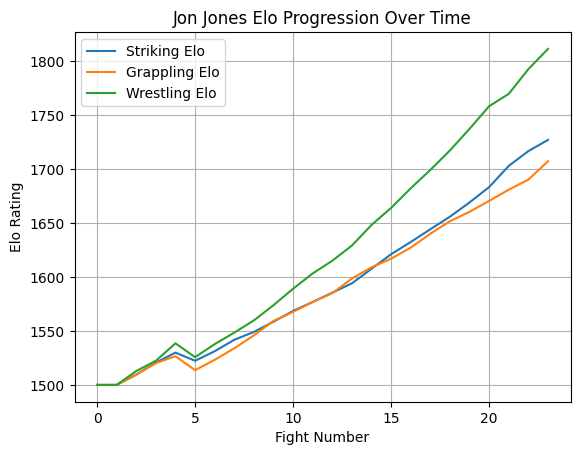

In [22]:
fighter_profiles['Jon Jones'].visualise_progression()